# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np 
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [5]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Expolratory Data Analysis

In [10]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [11]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [12]:
df['title'].nunique()

110

## Creating new features

In [24]:
def extract (strr):
    
    return strr.split(':')[0]

In [26]:
df['Reason'] = df['title'].apply(lambda x:extract(x))

In [28]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

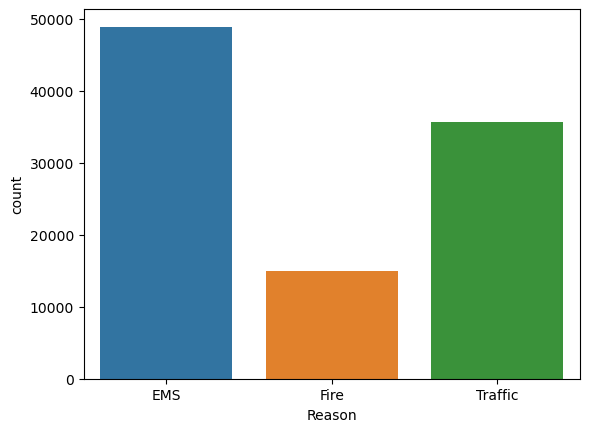

In [29]:
sns.countplot(df,x='Reason')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [42]:
type(df['timeStamp'].iloc[0])

str

In [45]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [54]:
time = df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [58]:
df['Hour'] = df['timeStamp'].dt.hour


0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int32

In [62]:
df['Month'] = df['timeStamp'].dt.month

array([12,  1,  2,  3,  4,  5,  6,  7,  8])

In [67]:
df['Day of Week'] = df['timeStamp'].dt.dayofweek
df['Day of Week'] = df['Day of Week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

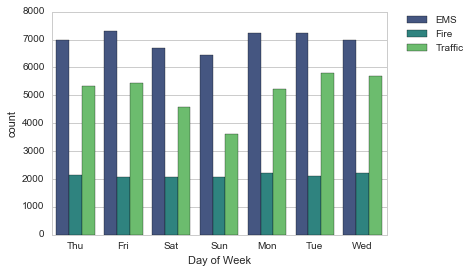

**Now do the same for Month:**

<Axes: xlabel='Month', ylabel='count'>

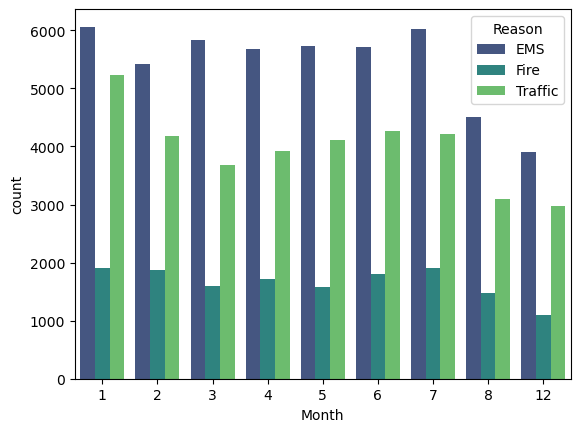

In [72]:
sns.countplot(df,x='Month',hue='Reason',palette='viridis')

In [80]:
grouped = df.groupby('Month').count()
grouped.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='Month', ylabel='e'>

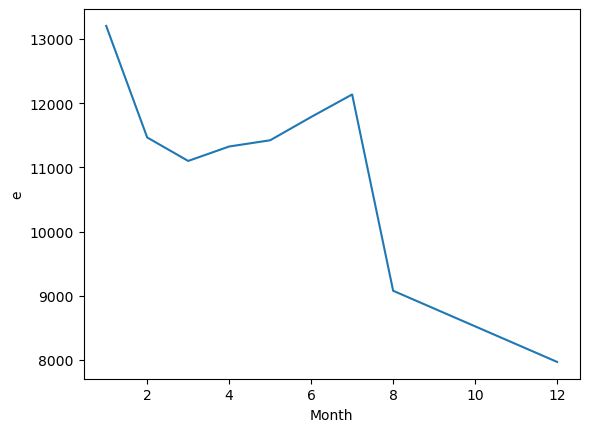

In [81]:
sns.lineplot(grouped,x='Month',y='e')

In [90]:
rest_grouped = grouped.reset_index()

C:\Users\East-Sound\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


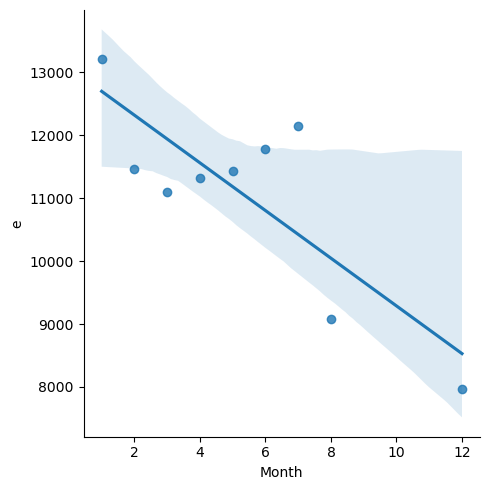

In [91]:
sns.lmplot(x='Month',y='e',data =rest_grouped)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [93]:
df['Date'] = df['timeStamp'].dt.date
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [95]:
grouped_by_date = df.groupby('Date').count()
grouped_by_date

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

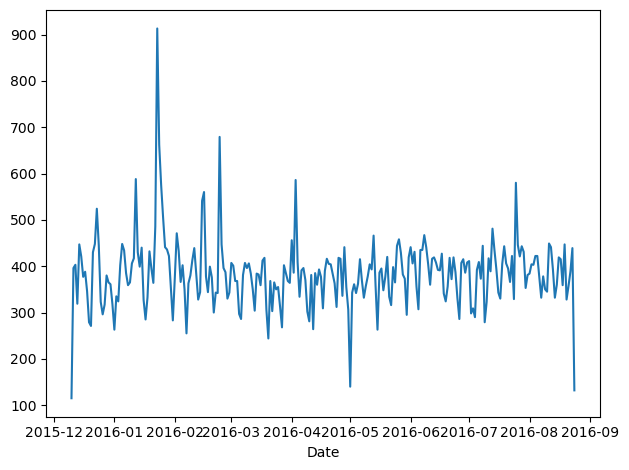

In [101]:
grouped_by_date['e'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [106]:
Traffic =df[df['Reason'] == 'Traffic'].groupby('Date').count()['e']

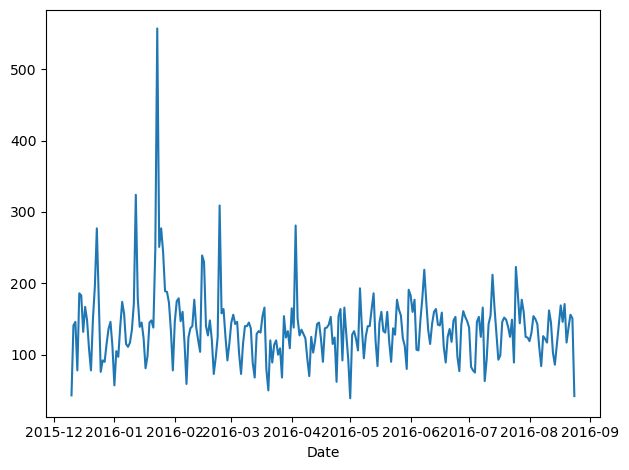

In [108]:
Traffic.plot()
plt.tight_layout()

In [123]:
df1 = df.groupby(by=['Day of Week','Hour']).count()['e'].unstack()
df1

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<Axes: xlabel='Hour', ylabel='Day of Week'>

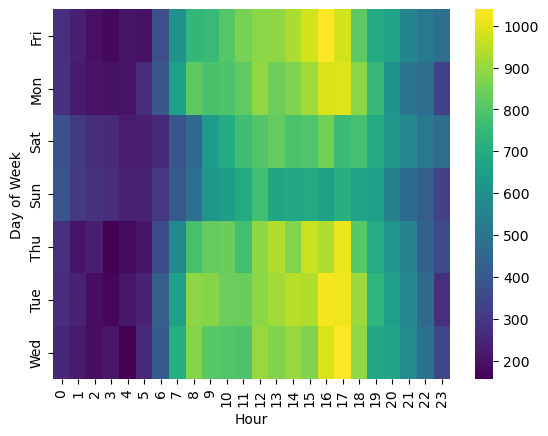

In [127]:
sns.heatmap(df1 ,cmap = 'viridis')

** Now create a clustermap using this DataFrame. **

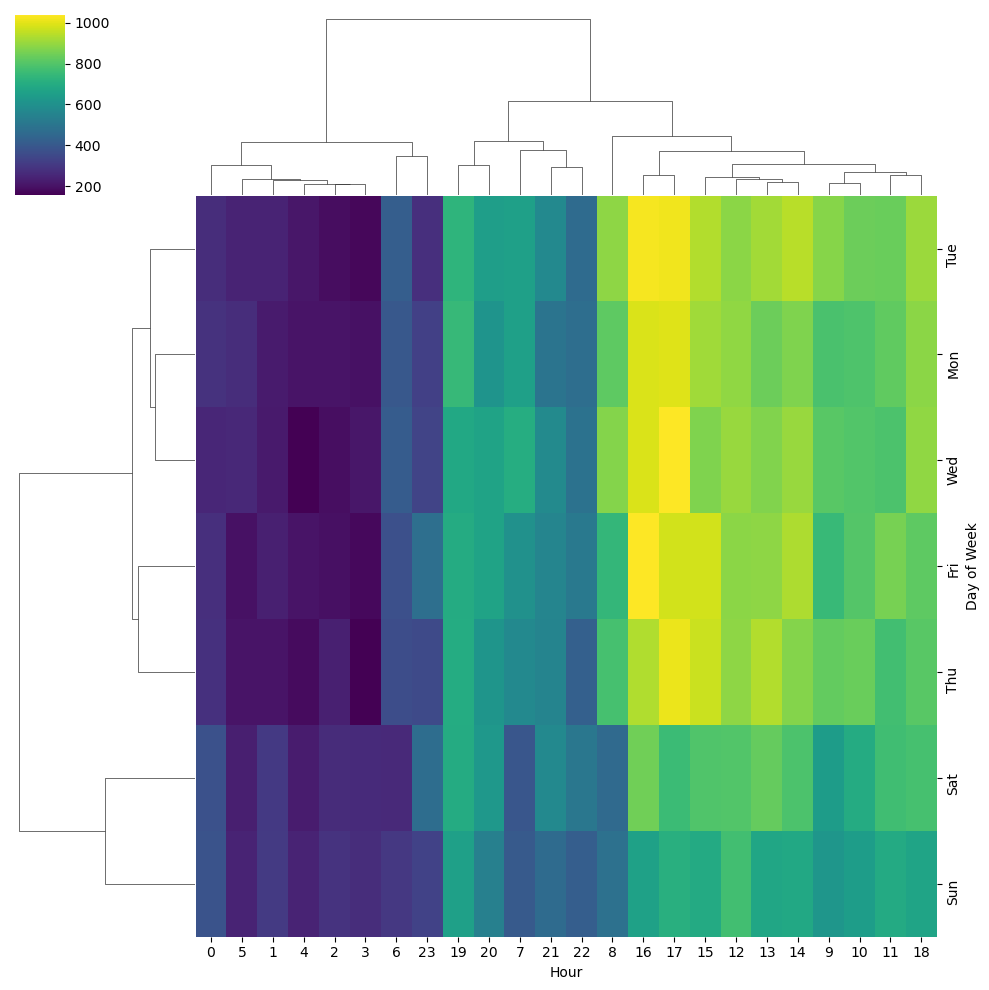

In [130]:
sns.clustermap(df1,cmap = 'viridis')

In [132]:
df2 = df.groupby(by=['Day of Week','Month']).count()['e'].unstack()
df2

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<Axes: xlabel='Month', ylabel='Day of Week'>

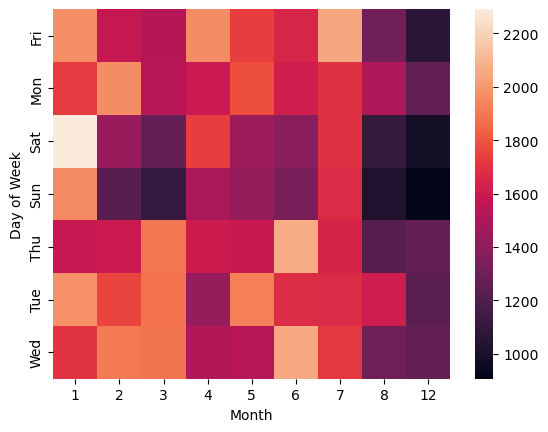

In [133]:
sns.heatmap(df2)

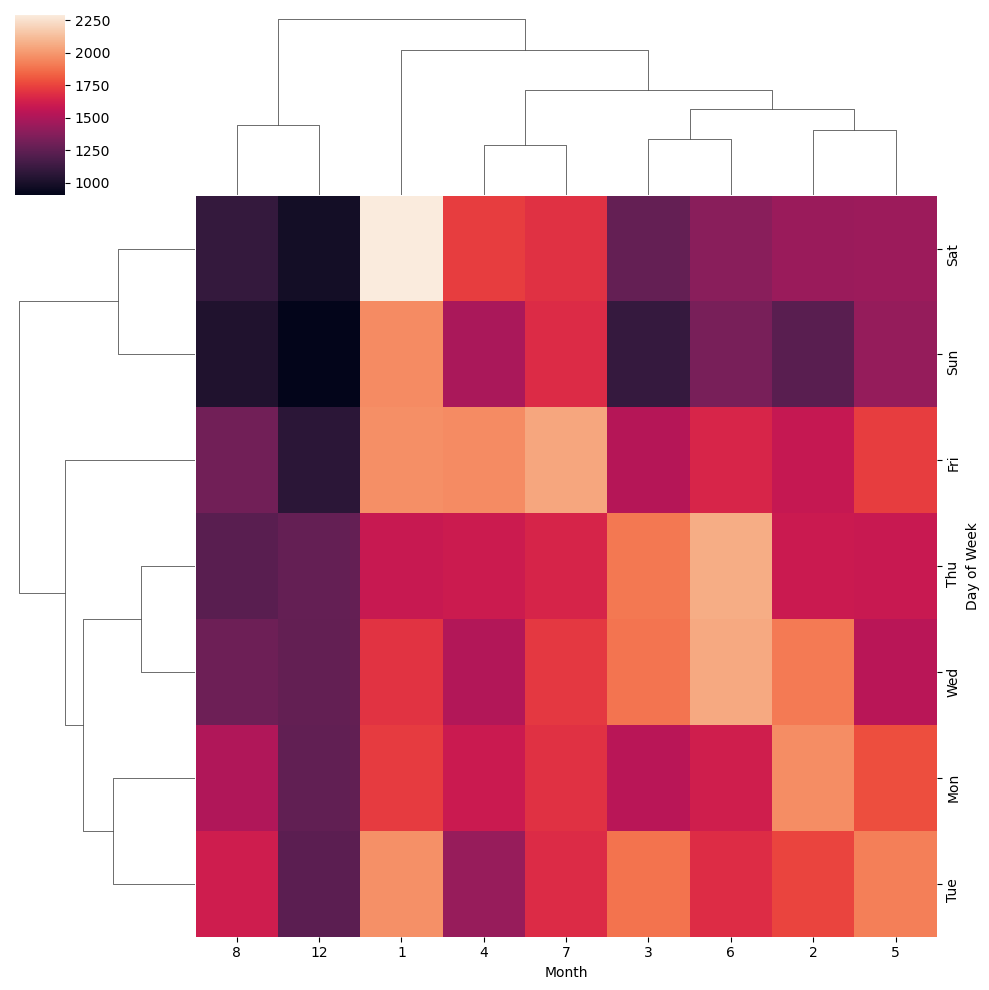

In [134]:
sns.clustermap(df2)